In [138]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy as sp
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy import signal
plt.rcParams['axes.formatter.useoffset'] = False
import numpy as np
from scipy.optimize import curve_fit
import scipy as sp
from scipy import stats
import glob
import os


In [101]:
from scipy.signal import filtfilt
def PasaBajos(senal):
  fs = 365 #pienso en años, como la unidad es el año, mi frec de muestreo es 365 muestras por año (señal en días)
  frec_c = 1.2 #Tres muestras por año o sea frecuencia de corte es un trimestre (2 sería 6 meses y es demasiado)
  nyq = .5*fs #Nysquits para pasarle al filtro
  frec = frec_c / nyq
  orden = 6
  b,a = scipy.signal.butter(orden,frec,'low',analog=False,output='ba') #Filtro butterworth
  y = scipy.signal.filtfilt(b,a,senal,axis=0)
  return y


In [102]:
from itertools import permutations
import numpy as np

#Funcion para evaluar la permutacion a la que corresponde unna ventana
def evaluate_order(values):
    # Ordeno la lista
    sorted_values = sorted(values)
    # Mapeo los valores ordenados con su indice
    order_dict = {value: index + 1 for index, value in enumerate(sorted_values)}
    # Genero lista con permutacion 
    order = [order_dict[value] for value in values]
    return order

def entropia_y_complejidad(serie_tiempo,n):
    #Defino largo de la ventana
    #n = 4
    #Permutaciones posibles 
    permutaciones_posibles = list(permutations(np.arange(1,n+1,1)))
    #Selecciono ventanas de largo n en la serie de tiempo
    ventanas = [serie_tiempo[i:i+n] for i in range(len(serie_tiempo) - n + 1)]
    #Evaluo la permutacion de cada ventana
    permutaciones = [evaluate_order(ventana) for ventana in ventanas]

    #Evaluo las probabilidades de cada permutacion posible y la guardo en un vector p_i
    probabilidades = np.zeros(len(permutaciones_posibles))
    for i,lista_a_contar in enumerate(permutaciones_posibles):
        # Inicializar el contador para la permutacion i
        contador = 0
        # Recorrer la lista de permutaciones de las ventanitas
        for sublista in permutaciones:
            if tuple(sublista) == lista_a_contar: 
                contador += 1      #Suma al contador cada vez que una ventanita corresponde a la permutacion i
        
        probabilidades[i] = contador/len(permutaciones) #Calcula la probabilidad de la permutacion i


    #Evaluo H normalizada, desequilibrio y complejidad
    p = np.array(probabilidades)
    p_sin_ceros = p[p!=0]
    H = -sum(p_sin_ceros*np.log2(p_sin_ceros))/np.log2(np.math.factorial(n))
    c = H*(sum(p-(1/len(p))**2))
    return H, c

def entropia_y_complejidad_wootters(serie_tiempo,n):
    #Defino largo de la ventana
    #n = 4
    #Permutaciones posibles 
    permutaciones_posibles = list(permutations(np.arange(1,n+1,1)))
    #Selecciono ventanas de largo n en la serie de tiempo
    ventanas = [serie_tiempo[i:i+n] for i in range(len(serie_tiempo) - n + 1)]
    #Evaluo la permutacion de cada ventana
    permutaciones = [evaluate_order(ventana) for ventana in ventanas]

    #Evaluo las probabilidades de cada permutacion posible y la guardo en un vector p_i
    probabilidades = np.zeros(len(permutaciones_posibles))
    for i,lista_a_contar in enumerate(permutaciones_posibles):
        # Inicializar el contador para la permutacion i
        contador = 0
        # Recorrer la lista de permutaciones de las ventanitas
        for sublista in permutaciones:
            if tuple(sublista) == lista_a_contar: 
                contador += 1      #Suma al contador cada vez que una ventanita corresponde a la permutacion i
        
        probabilidades[i] = contador/len(permutaciones) #Calcula la probabilidad de la permutacion i

    #Evaluo H normalizada, desequilibrio y complejidad
    p = np.array(probabilidades)
    p_sin_ceros = p[p!=0]
    H = -sum(p_sin_ceros*np.log2(p_sin_ceros))/np.log2(np.math.factorial(n))
    qw = (1/np.arccos((1/np.math.factorial(n))**(1/2)))*np.arccos(sum(p**(1/2)*(1/np.math.factorial(n))**(1/2)))
    c = H*qw
    return H, c

In [198]:
import glob
path_here = os.getcwd()
path_integraciones = path_here #+'/ENSO_2020'
path_simulaciones_CESM = path_here+'/ENSO_2020'
# Abro simulaciones
lista=[]
lista=glob.glob(path_simulaciones_CESM+'/nino_senal_CESM2*.txt')
lista.sort()

print(len(lista))
lista

10


['/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/ENSO_2020/nino_senal_CESM2_1.txt',
 '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/ENSO_2020/nino_senal_CESM2_10.txt',
 '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/ENSO_2020/nino_senal_CESM2_2.txt',
 '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/ENSO_2020/nino_senal_CESM2_3.txt',
 '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/ENSO_2020/nino_senal_CESM2_4.txt',
 '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/ENSO_2020/nino_senal_CESM2_5.txt',
 '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/ENSO_2020/nino_senal_CESM2_6.txt',
 '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/ENSO_2020/nino_senal_CESM2_7.txt',
 '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/ENSO_2020/nino_senal_CESM2_8.txt',
 '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Co

In [199]:
x=[]
y=[]
for file in lista:
  datos=np.loadtxt(file)
  datos = PasaBajos(datos)
  señal=datos[1:len(datos):36]/max(datos)
  print('entropia y complejidad   ' + str(entropia_y_complejidad_wootters(señal,5)))
  r,s=entropia_y_complejidad_wootters(señal,5)
  x.append(r)
  y.append(s)



entropia y complejidad   (0.5382067477018442, 0.4199015864294229)
entropia y complejidad   (0.5328163154640773, 0.417749437530124)
entropia y complejidad   (0.53706339609123, 0.41401551437497086)
entropia y complejidad   (0.5420233065931431, 0.4219179528464971)
entropia y complejidad   (0.5364727383858828, 0.4176261984823996)
entropia y complejidad   (0.5428422907086126, 0.42229583726060116)
entropia y complejidad   (0.5407389165950378, 0.42032754189477484)
entropia y complejidad   (0.52802902283202, 0.4177974147608465)
entropia y complejidad   (0.546904414481813, 0.41965173371707426)
entropia y complejidad   (0.5388015814003646, 0.4215410182339225)


In [202]:
np.mean(y)

0.4192824235530634

In [144]:
señal_ref_1 = np.sin(2*np.pi*np.linspace(0,160,60000))
señal_ref_2 = np.random.normal(1,1,60000)

u1,v1=entropia_y_complejidad_wootters(señal_ref_1[1:len(señal_ref_1):36],5)
u2,v2=entropia_y_complejidad_wootters(señal_ref_2[1:len(señal_ref_2):36],5)


In [176]:

lista2=[]
lista2=glob.glob(path_integraciones+'/periodo4_masruido/*.txt')
lista2.sort()

print(len(lista2))

11


In [177]:
x2=[]
y2=[]
for file in lista2:
  datos=np.loadtxt(file)
  señal=datos[1:len(datos):36]/max(datos)
  #señal=datos[10000:len(datos):36]/max(datos)+0.045*ruido[10000:len(datos):36]
  print('entropia y complejidad   ' + str(entropia_y_complejidad_wootters(señal,5)))
  r2,s2=entropia_y_complejidad_wootters(señal,5)
  x2.append(r2)
  y2.append(s2)

entropia y complejidad   (0.6659442313222212, 0.45862634840380045)
entropia y complejidad   (0.6822863732893432, 0.4490896515262157)
entropia y complejidad   (0.7098139990213889, 0.4479108919714697)
entropia y complejidad   (0.6449966955588243, 0.46380052009670003)
entropia y complejidad   (0.6641314141564051, 0.4609524121116117)
entropia y complejidad   (0.6297441316201092, 0.46764392093163915)
entropia y complejidad   (0.7596456282164491, 0.4329353624795523)
entropia y complejidad   (0.6362045155768916, 0.46664607201751934)
entropia y complejidad   (0.6290636178241075, 0.4692104223557613)
entropia y complejidad   (0.6998708145382389, 0.4626061761472169)
entropia y complejidad   (0.6449499410644423, 0.463271068153863)


In [190]:

lista3=[]
lista3=glob.glob(path_integraciones+'/cerca_periodo4_caos/*.txt')
lista3.sort()

print(len(lista3))

11


In [191]:
x3=[]
y3=[]
for file in lista3:
  datos=np.loadtxt(file)
  señal=datos[1:len(datos):36]/max(datos)
  #señal=datos[10000:len(datos):36]/max(datos)+0.045*ruido[10000:len(datos):36]
  print('entropia y complejidad   ' + str(entropia_y_complejidad_wootters(señal,5)))
  r3,s3=entropia_y_complejidad_wootters(señal,5)
  x3.append(r3)
  y3.append(s3)

entropia y complejidad   (0.5148956902740971, 0.4037846843815846)
entropia y complejidad   (0.5233587651867172, 0.4063112830672511)
entropia y complejidad   (0.5353116280723325, 0.4124095021502901)
entropia y complejidad   (0.5307251045682525, 0.411680445204691)
entropia y complejidad   (0.5313379685863335, 0.4103574566177081)
entropia y complejidad   (0.5343163987146838, 0.4112778683716663)
entropia y complejidad   (0.5317886783027617, 0.41049332360378804)
entropia y complejidad   (0.5238136634634118, 0.4082844865316327)
entropia y complejidad   (0.5215958056619658, 0.4064929943572366)
entropia y complejidad   (0.5277742846591403, 0.4098000843442581)
entropia y complejidad   (0.536055656209957, 0.4130761599320866)


In [179]:
lista4=[]
lista4=glob.glob(path_integraciones+'/periodo4/*.txt')
lista4.sort()

print(len(lista4))

11


In [180]:
x4=[]
y4=[]
for file in lista4:
  datos=np.loadtxt(file)
  señal=datos[10000:len(datos):36]/max(datos)
  print('entropia y complejidad   ' + str(entropia_y_complejidad_wootters(señal,5)))
  r4,s4=entropia_y_complejidad_wootters(señal,5)
  x4.append(r4)
  y4.append(s4)

entropia y complejidad   (0.47717977703181147, 0.3903295168240983)
entropia y complejidad   (0.47705809249772274, 0.3905690542921602)
entropia y complejidad   (0.4723890333194694, 0.3872368186647451)
entropia y complejidad   (0.47720460411541304, 0.38937069043861633)
entropia y complejidad   (0.48122358065828474, 0.3913020855299092)
entropia y complejidad   (0.47601327426607837, 0.38899165895263726)
entropia y complejidad   (0.4721133479913083, 0.3883915543027126)
entropia y complejidad   (0.4672735136337734, 0.38634475754506936)
entropia y complejidad   (0.4737711818121721, 0.3878351731540918)
entropia y complejidad   (0.4717719229967458, 0.38813343296087965)
entropia y complejidad   (0.4767139591909604, 0.38920851716908017)


In [167]:
alpha = np.arange(0.01,0.2,0.01)
noise = {}
noise['x'] = {}
noise['y'] = {}
for i,a in enumerate(alpha):
  print(i)
  noise['x'][i] = []
  noise['y'][i] = []
  for file in lista5:
    datos=np.loadtxt(file)
    ruido=np.zeros(len(datos))
    ruido=np.random.normal(0,.7,len(datos))
    señal=datos[10000:len(datos):36]/max(datos)+a*ruido[10000:len(datos):36]
    print('entropia y complejidad   ' + str(entropia_y_complejidad_wootters(señal,5)))
    r,s=entropia_y_complejidad_wootters(señal,5)
    noise['x'][i].append(r)
    noise['y'][i].append(s)

0


entropia y complejidad   (0.5432806781244751, 0.416426161118042)
entropia y complejidad   (0.5450485633302153, 0.42156885093714763)
entropia y complejidad   (0.5388776699485957, 0.41652078946201926)
entropia y complejidad   (0.5436890356515527, 0.41910006157576957)
entropia y complejidad   (0.5439908079887797, 0.41985022586937765)
entropia y complejidad   (0.5400699805479764, 0.4175419467748203)
entropia y complejidad   (0.5380627264649438, 0.4169534446242362)
entropia y complejidad   (0.544911680815909, 0.41509858509990716)
entropia y complejidad   (0.5372796905601074, 0.4155626164651193)
entropia y complejidad   (0.547685566882937, 0.4214203411320954)
entropia y complejidad   (0.5553616797146763, 0.42420063651302387)
1
entropia y complejidad   (0.5649465522596868, 0.4148190502899317)
entropia y complejidad   (0.5739429798288115, 0.4214321497518345)
entropia y complejidad   (0.5638522348050443, 0.4194856164601534)
entropia y complejidad   (0.5579685281123169, 0.4177827962152456)
entr

KeyboardInterrupt: 

In [188]:
lista5=[]
lista5=glob.glob(path_integraciones+'/cerca_periodo4_caos_ruido/*.txt')
lista5.sort()

print(len(lista5))

x5=[]
y5=[]
for file in lista5:
  datos=np.loadtxt(file)
  ruido=np.zeros(len(datos))
  ruido=np.random.normal(0,.7,len(datos))
  señal=datos[10000:len(datos):36]/max(datos)#+0.02*ruido[10000:len(datos):36]
  print('entropia y complejidad   ' + str(entropia_y_complejidad_wootters(señal,5)))
  r5,s5=entropia_y_complejidad_wootters(señal,5)
  x5.append(r5)
  y5.append(s5)
  

11
entropia y complejidad   (0.5105598008063679, 0.408924387402969)
entropia y complejidad   (0.5282940886328704, 0.41312570340316984)
entropia y complejidad   (0.5302590723546605, 0.4132223033166318)
entropia y complejidad   (0.5166586055257126, 0.4107577164272158)
entropia y complejidad   (0.5195447671538657, 0.41176477607223516)
entropia y complejidad   (0.5187187608375754, 0.41174822987607773)
entropia y complejidad   (0.5149254462389887, 0.410187475835063)
entropia y complejidad   (0.5305601645313753, 0.4151269168916791)
entropia y complejidad   (0.5218312699222613, 0.4112526277039762)
entropia y complejidad   (0.5253177436914169, 0.41450227713264776)
entropia y complejidad   (0.5202229986392626, 0.41318896254626825)


In [169]:

alpha = np.arange(0.01,0.2,0.01)
noise = {}
noise['x'] = {}
noise['y'] = {}
for i,a in enumerate(alpha):
  print(i)
  noise['x'][i] = []
  noise['y'][i] = []
  for file in lista5:
    datos=np.loadtxt(file)
    ruido=np.zeros(len(datos))
    ruido=np.random.normal(0,.7,len(datos))
    señal=datos[10000:len(datos):36]/max(datos)+a*ruido[10000:len(datos):36]
    print('entropia y complejidad   ' + str(entropia_y_complejidad_wootters(señal,5)))
    r,s=entropia_y_complejidad_wootters(señal,5)
    noise['x'][i].append(r)
    noise['y'][i].append(s)

0
entropia y complejidad   (0.543277619830831, 0.4151542612593248)
entropia y complejidad   (0.5518565503465609, 0.41911601269669846)
entropia y complejidad   (0.5450023459245359, 0.4181190883382595)
entropia y complejidad   (0.5384006906058446, 0.41859828736580257)
entropia y complejidad   (0.5421074618358777, 0.4172254700095683)
entropia y complejidad   (0.5478884267085694, 0.41969521265396936)
entropia y complejidad   (0.5395855394783288, 0.4163005494515745)
entropia y complejidad   (0.539220465725704, 0.41424582549435807)
entropia y complejidad   (0.5405201616626581, 0.41536742717786657)
entropia y complejidad   (0.5494611818354416, 0.421379134288122)
entropia y complejidad   (0.5479970485831451, 0.4232706385290304)
1
entropia y complejidad   (0.5725757774171855, 0.41774829689275084)
entropia y complejidad   (0.5767253650332743, 0.4209588900117937)
entropia y complejidad   (0.5790127470915275, 0.4181805450514828)
entropia y complejidad   (0.5757672990527147, 0.4214129913127015)
ent

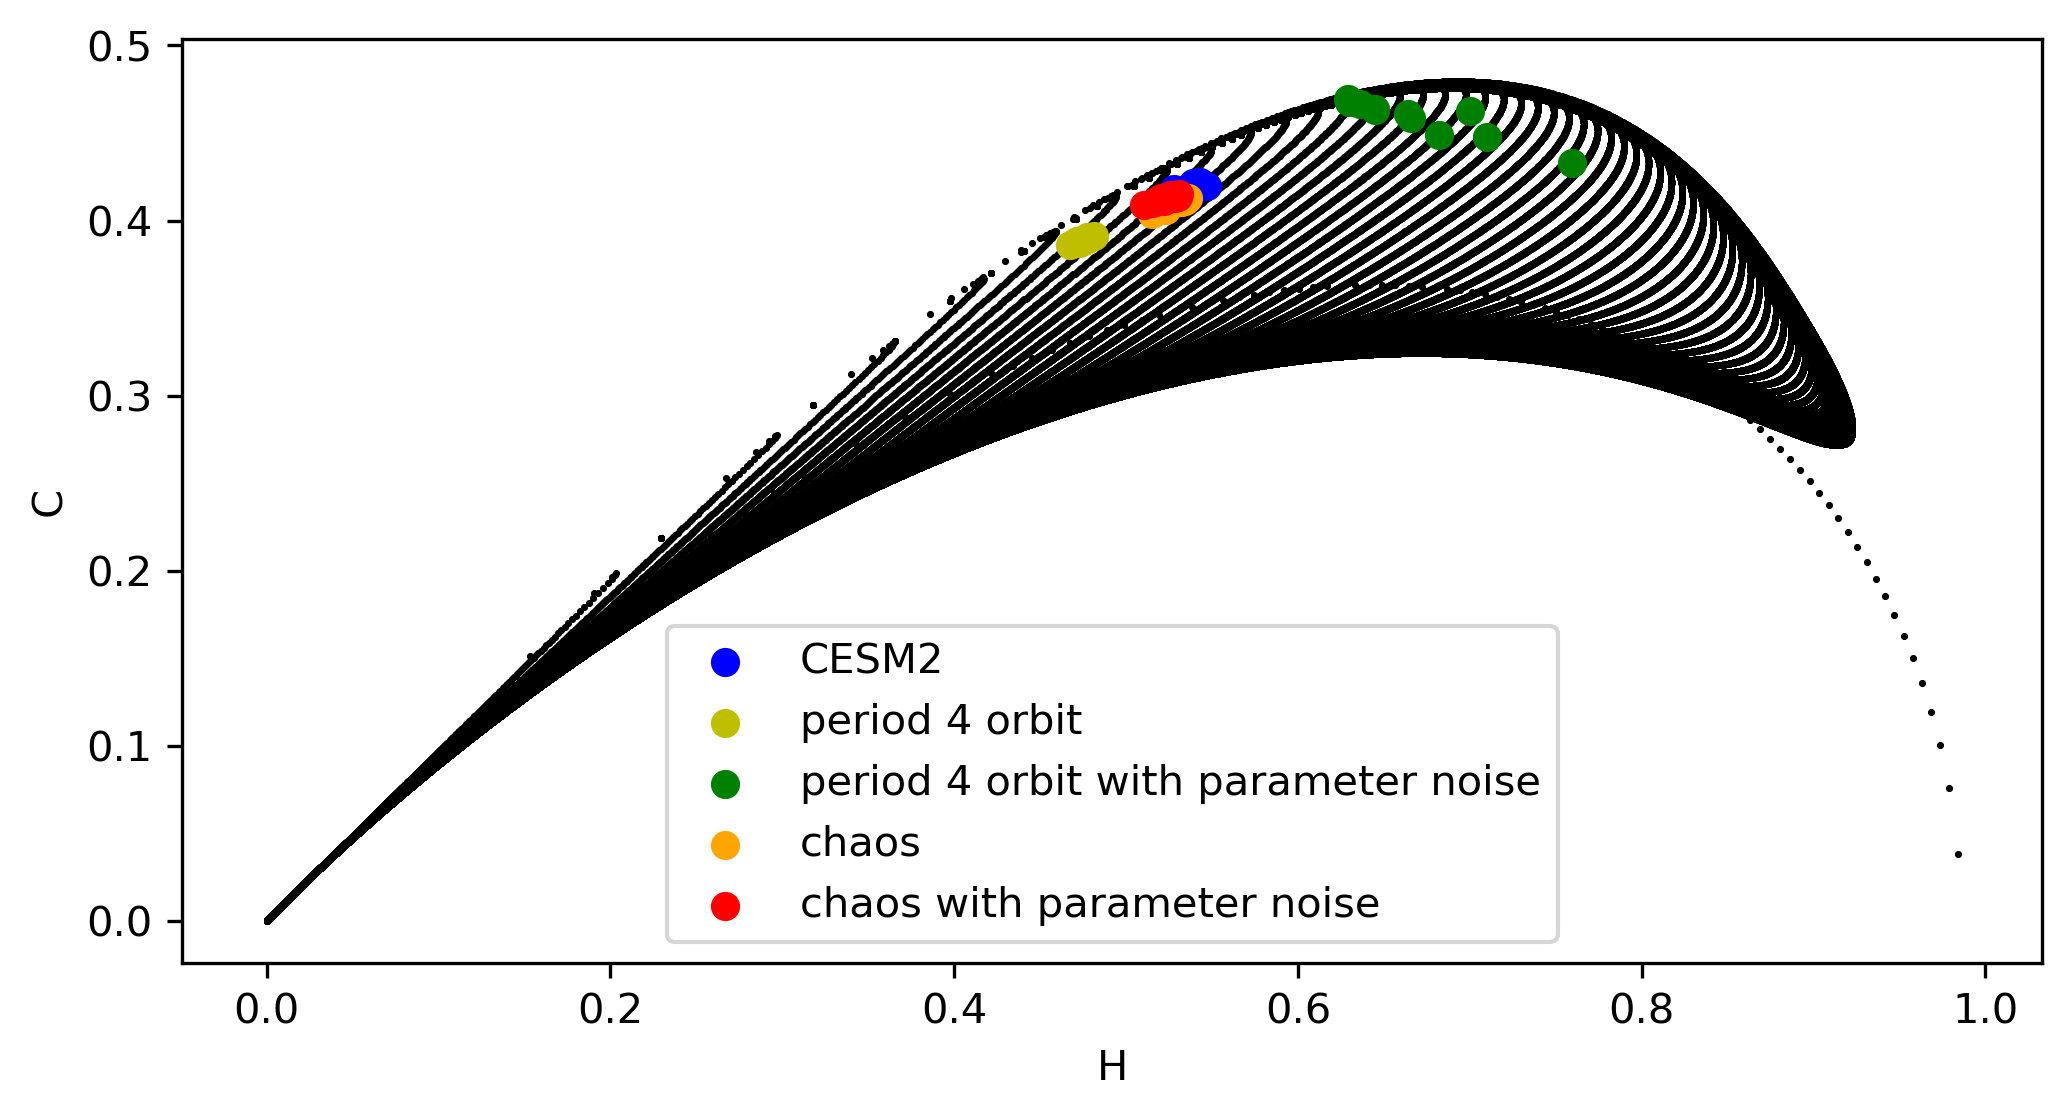

In [197]:
from matplotlib.pyplot import cm
fig = plt.figure(figsize=(8,4),dpi=300)
#color = cm.Greys(np.linspace(0.4, 1, len(noise['y'])))
#color_reds = cm.Reds(np.linspace(0.4, 1, len(noise['y'])))
#for i, c in enumerate(color):
#    plt.scatter(noise['x'][i],noise['y'][i],color=c,alpha=0.4)#,label='orbit integration (T=4) w/ parameter noise and additive noise (alpha='+str(alpha[i])+')')
plt.scatter(h[:],c[:],color='k',s=0.4)
plt.scatter(x,y,color='b',label='CESM2')
plt.scatter(x4,y4,color='y',label='period 4 orbit')
plt.scatter(x2,y2,color='g',label='period 4 orbit with parameter noise')
plt.scatter(x3,y3,color='orange',label='chaos')
plt.scatter(x5,y5,color='red',label='chaos with parameter noise')
plt.ylabel('C')
plt.xlabel('H')
#plt.scatter(u2,v2,color='k')
# plt.xlim([0.0, 1.1])
# plt.ylim([-0.01, 0.1])
plt.xlabel('H')
plt.ylabel('C')
plt.legend()
plt.show()


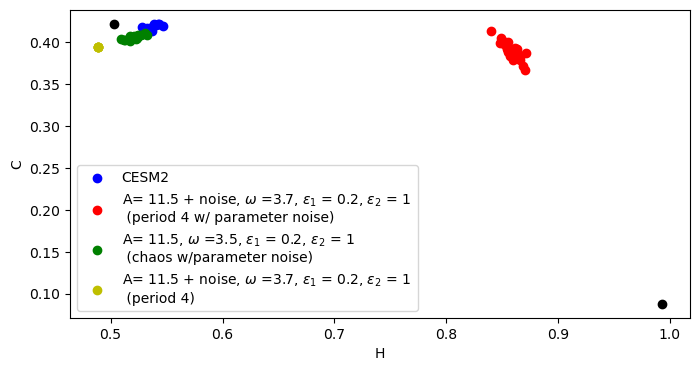

In [33]:
from matplotlib.pyplot import cm
fig = plt.figure(figsize=(8,4))
plt.scatter(x,y,color='b',label='CESM2')
plt.scatter(x2,y2,color='red',label='A= 11.5 + noise, $\omega$ =3.7, $\epsilon_1$ = 0.2, $\epsilon_2$ = 1 \n (period 4 w/ parameter noise)')
plt.scatter(x3,y3,color='g',label='A= 11.5, $\omega$ =3.5, $\epsilon_1$ = 0.2, $\epsilon_2$ = 1 \n (chaos w/parameter noise)')
plt.scatter(x4,y4,color='y',label='A= 11.5 + noise, $\omega$ =3.7, $\epsilon_1$ = 0.2, $\epsilon_2$ = 1 \n (period 4)')
plt.scatter(u2,v2,color='k')
plt.scatter(u1,v1,color='k')
# plt.xlim([0.0, 1.1])
# plt.ylim([-0.01, 0.1])
plt.xlabel('H')
plt.ylabel('C')
plt.legend()
plt.show()

In [131]:
import random
import numpy as np
from itertools import permutations
import matplotlib.pyplot as plt
import funciones_dinamica as fd

def moving_average(arr):
    result = [(arr[i-1] + arr[i] + arr[i+1]) / 3 if i > 0 and i < len(arr)-1 else arr[i] for i in range(len(arr))]
    return result

def non_overlapping_average(arr, window_size=3):
    result = [(sum(arr[i:i+window_size]) / window_size) if i + window_size <= len(arr) else sum(arr[i:]) / len(arr[i:]) for i in range(0, len(arr), window_size)]
    return result

c = []
h = []
j=0
n = 5
while j < 120:
    probabilidades = np.zeros(120)
    probabilidades[10] = 1
    probabilidades_it = probabilidades
    for k in range(10000):
        probabilidades_it = moving_average(probabilidades_it)
        p = np.array(probabilidades_it)
        p_sin_ceros = p[p!=0]
        H = -sum(p_sin_ceros*np.log2(p_sin_ceros))/np.log2(np.math.factorial(n))
        qw = (1/np.arccos((1/np.math.factorial(n))**(1/2)))*np.arccos(sum(p**(1/2)*(1/np.math.factorial(n))**(1/2)))
        d= sum((p-1/np.math.factorial(n))**2)
        c.append(H*d)
        h.append(H)
    
    j = j+1
    
    

KeyboardInterrupt: 

In [173]:
import random
import numpy as np
from itertools import permutations
import matplotlib.pyplot as plt
import funciones_dinamica as fd

def moving_average(arr):
    result = [(arr[i-1] + arr[i] + arr[i+1]) / 3 if i > 0 and i < len(arr)-1 else arr[i] for i in range(len(arr))]
    return result

c = []
h = []
j=0
n = 5
while j < 120:
    probabilidades = np.zeros(120)
    probabilidades[j] = 1
    probabilidades_it = probabilidades
    for k in range(40000):
        probabilidades_it = moving_average(probabilidades_it)
        p = np.array(probabilidades_it)
        p_sin_ceros = p[p!=0]
        H = -sum(p_sin_ceros*np.log2(p_sin_ceros))/np.log2(np.math.factorial(n))
        qw = (1/np.arccos((1/np.math.factorial(n))**(1/2)))*np.arccos(sum(p**(1/2)*(1/np.math.factorial(n))**(1/2)))
        c.append(H*qw)
        h.append(H)
    
    j = j+1
    

/var/folders/_j/djvzvp5n6pscgg9ndg0432pw0000gq/T/ipykernel_31145/4240242476.py:24: RuntimeWarning: invalid value encountered in arccos
  qw = (1/np.arccos((1/np.math.factorial(n))**(1/2)))*np.arccos(sum(p**(1/2)*(1/np.math.factorial(n))**(1/2)))


/var/folders/_j/djvzvp5n6pscgg9ndg0432pw0000gq/T/ipykernel_31145/36675138.py:22: RuntimeWarning: invalid value encountered in arccos
  qw = (1/np.arccos((1/np.math.factorial(n))**(1/2)))*np.arccos(sum(p**(1/2)*(1/np.math.factorial(n))**(1/2)))


Text(0.5, 0, 'H')

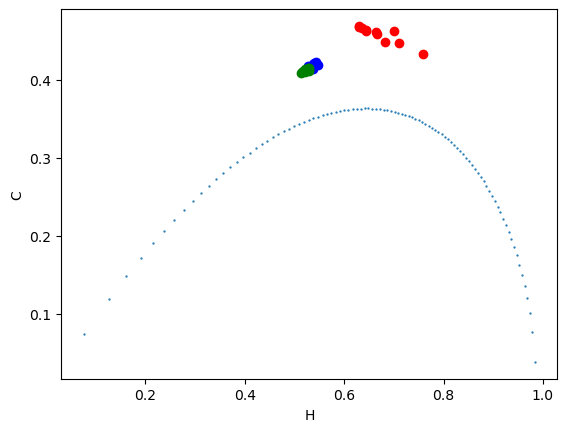

In [172]:
import random
import numpy as np
import matplotlib.pyplot as plt
import funciones_dinamica as fd

def moving_average(arr):
    result = [(arr[i-1] + arr[i] + arr[i+1]) / 3 if i > 0 and i < len(arr)-1 else arr[i] for i in range(len(arr))]
    return result

c = []
h = []
j=0
n = 5
probabilidades = np.zeros(120)
probabilidades[0] = 1
probabilidades_it = probabilidades
for k in range(4000):
    probabilidades_it = moving_average(probabilidades_it)
    p = np.array(probabilidades_it)
    p_sin_ceros = p[p!=0]
    H = -sum(p_sin_ceros*np.log2(p_sin_ceros))/np.log2(np.math.factorial(n))
    qw = (1/np.arccos((1/np.math.factorial(n))**(1/2)))*np.arccos(sum(p**(1/2)*(1/np.math.factorial(n))**(1/2)))
    d = sum((p_sin_ceros-1/np.math.factorial(n))**2)
    c.append(H*qw)
    h.append(H)
    
import matplotlib.pyplot as plt
plt.scatter(h[:],c[:],s=0.4)
plt.scatter(x,y,color='b',label='CESM2')
plt.scatter(x2,y2,color='red',label='A= 11.5 + noise, $\omega$ =3.7, $\epsilon_1$ = 0.2, $\epsilon_2$ = 1 \n (period 4 w/ parameter noise)')
plt.scatter(x3,y3,color='g',label='A= 11.5, $\omega$ =3.5, $\epsilon_1$ = 0.2, $\epsilon_2$ = 1 \n (chaos w/parameter noise)')
#plt.scatter(x4,y4,color='y',label='A= 11.5 + noise, $\omega$ =3.7, $\epsilon_1$ = 0.2, $\epsilon_2$ = 1 \n (period 4)')
plt.ylabel('C')
plt.xlabel('H')

Text(0.5, 0, 'H')

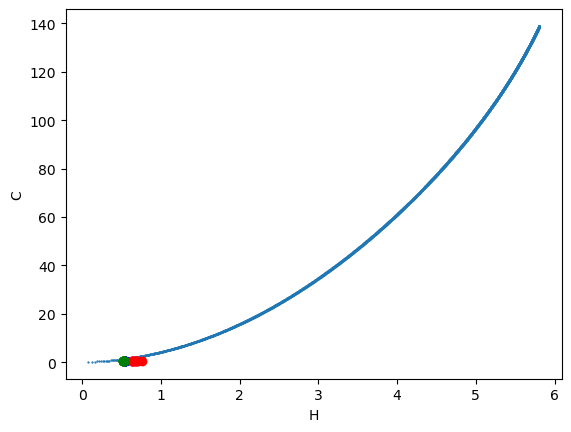

In [77]:
import random
import numpy as np
from itertools import permutations
import matplotlib.pyplot as plt
import funciones_dinamica as fd

def evaluate_order(values):
    """Evalua el orden de los valores (permutacion)
    por ejemplo si los valores son x1 < x2 < x3, devuelve [0,1,2]
    entrada: valores a ordenar (np.array o lista)
    salida: lista de orden (list)
    """
    # Ordeno la lista
    sorted_values = sorted(values)
    # Mapeo los valores ordenados con su indice
    order_dict = {value: index + 1 for index, value in enumerate(sorted_values)}
    # Genero lista con permutacion 
    order = [order_dict[value] for value in values]
    return order


c = []
h = []
j=0
n = 5
a1 = np.linspace(1,0,5)
a2 = np.zeros(5)
a = np.concatenate([a1,a2])
b1 = np.linspace(0,1,5)
b2 = np.linspace(1,0,5)
b = np.concatenate([b1,b2])
c1 = np.linspace(0.01,0,5)
c2 = np.linspace(0,0.1,5)
d = np.concatenate([c1,c2])
e = np.linspace(0,1,10)
while j < 10:
    #p=np.zeros(120)
    #for j in range(120):
    #    p[j]=random.uniform(0,1-sum(p))

    #p_sin_ceros = p[p!=0]
    #p = np.array(resulting_sets[i])
    señal_ref_2 = np.sin(2*np.pi*np.linspace(0,160,10000))
    señal_ref_3 = np.random.normal(d[j],d[j],10000)
    señal_ref_1 = np.linspace(0,1,10000)
    serie_tiempo = a[j]*señal_ref_1 + b[j]*señal_ref_2 + e[j]*señal_ref_3 #+ 
    r,s=fd.entropia_y_complejidad_wootters(serie_tiempo,5)
    print(j)
    print(r,s)
    ventanas = [serie_tiempo[i:i+n] for i in range(len(serie_tiempo) - n + 1)]
    permutaciones_posibles = list(permutations(np.arange(1,n+1,1)))
    #Evaluo la permutacion de cada ventana
    permutaciones = [evaluate_order(ventana) for ventana in ventanas]

    #Evaluo las probabilidades de cada permutacion posible y la guardo en un vector p_i
    probabilidades = np.zeros(len(permutaciones_posibles))
    for k,lista_a_contar in enumerate(permutaciones_posibles):
        # Inicializar el contador para la permutacion i
        contador = 0
        # Recorrer la lista de permutaciones de las ventanitas
        for sublista in permutaciones:
            if tuple(sublista) == lista_a_contar: 
                contador += 1      #Suma al contador cada vez que una ventanita corresponde a la permutacion i
        
        probabilidades[k] = contador/len(permutaciones) #Calcula la probabilidad de la permutacion i
        
    p = np.array(probabilidades)
    p_sin_ceros = p[p!=0]
    H = -sum(p_sin_ceros*np.log2(p_sin_ceros))/np.log2(np.math.factorial(n))
    qw = (1/np.arccos((1/np.math.factorial(n))**(1/2)))*np.arccos(sum(p**(1/2)*(1/np.math.factorial(n))**(1/2)))
    c.append(H*qw)
    h.append(H)
    
    j = j+1
    
    

0
-0.0 -0.0
1
0.2626793057367851 0.22890049870870244
2
0.25728861666043346 0.22768226172178094
3
0.2530974576700304 0.22618109919952561
4
0.24679208730825783 0.22491154043125894
5
0.24679208730825783 0.22491154043125894
6
0.4333116453394215 0.3007311259151582
7
0.8287694069916979 0.33652320752798587
8
0.9918755244425218 0.09271853369950032
9
0.9989022814293815 0.0346471488979224


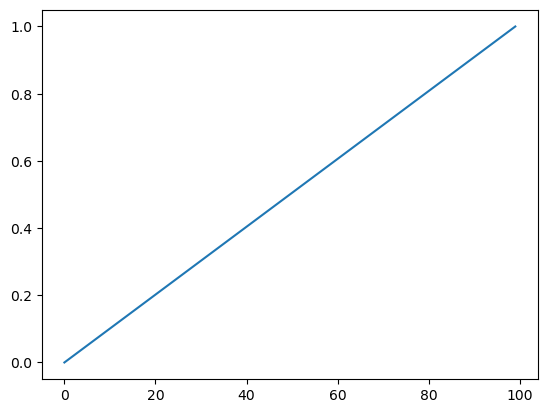

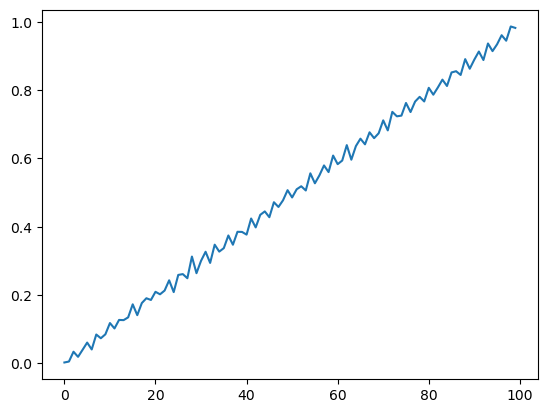

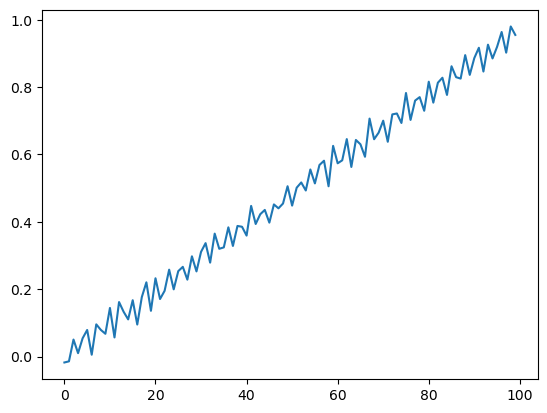

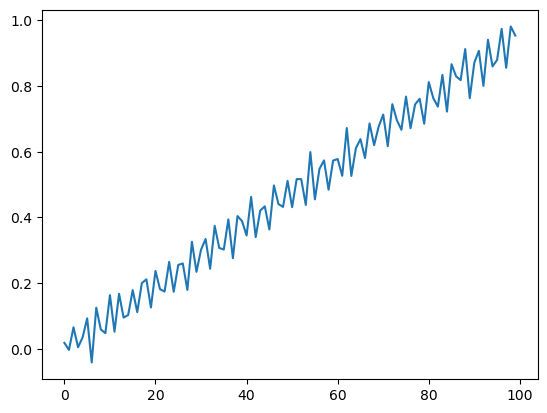

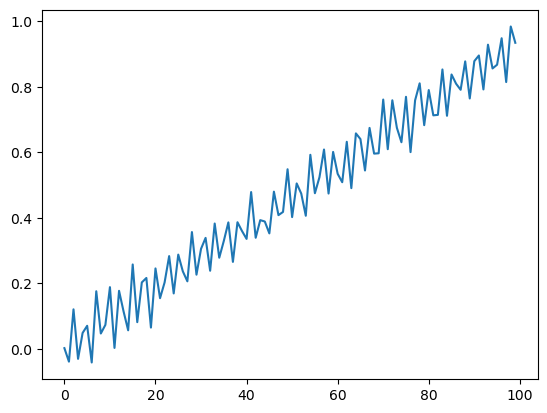

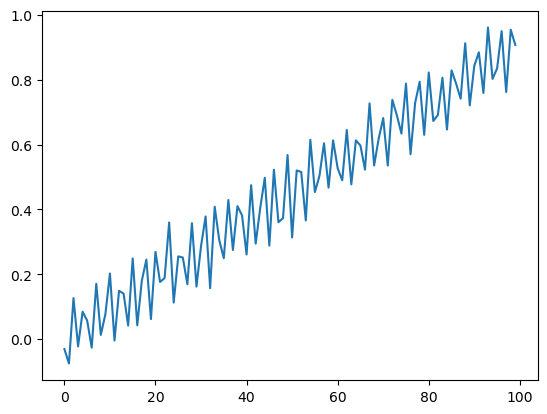

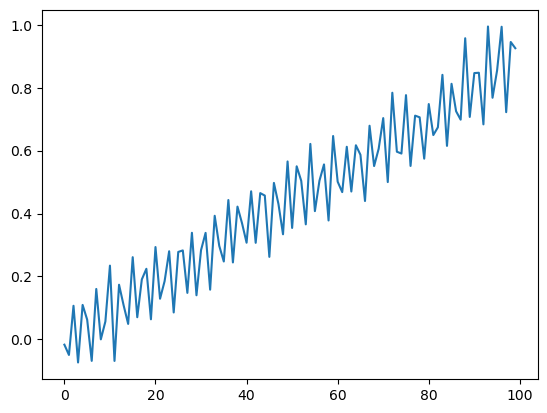

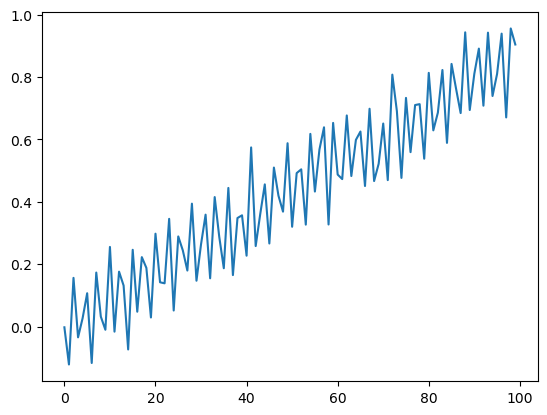

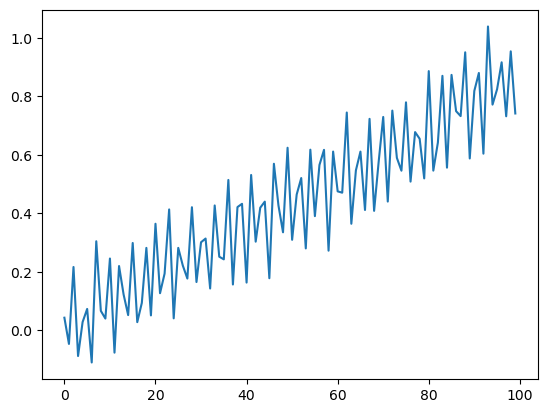

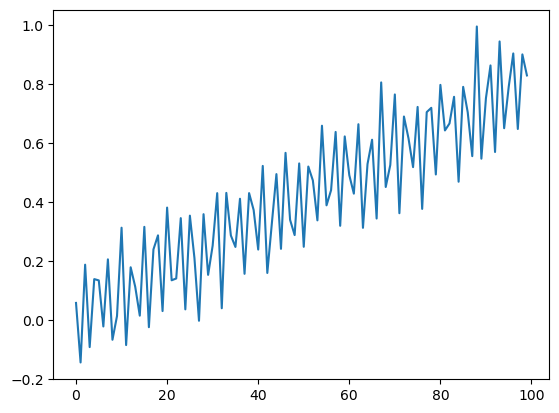

In [53]:
plt.close()
a = np.linspace(1,-1,100)
b = np.linspace(0,1,100)
c1 = np.zeros(50)
c2 = np.linspace(0,0.5,50)
c = np.concatenate([c1,c2])
for j in range(10):
    fig = plt.figure()
    señal_ref_2 = np.sin(2*np.pi*np.linspace(0,160,100))
    señal_ref_3 = np.random.normal(b[j],0.5,100)
    señal_ref_1 = np.linspace(0,1,100)
    serie_tiempo = a[j]*señal_ref_1 + c[j]*señal_ref_2 + b[j]*señal_ref_3 #+ 
    plt.plot(serie_tiempo)
    j = j+1

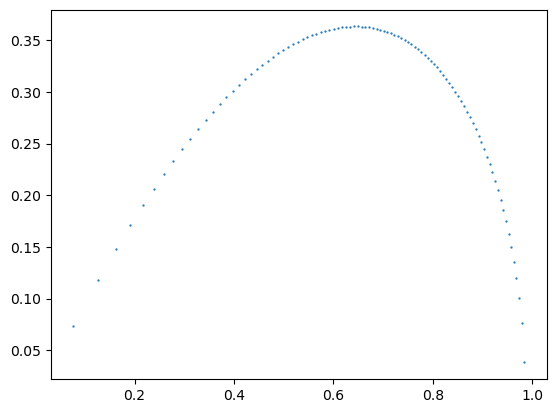

In [95]:
import matplotlib.pyplot as plt
plt.scatter(h[:],c[:],s=0.4)

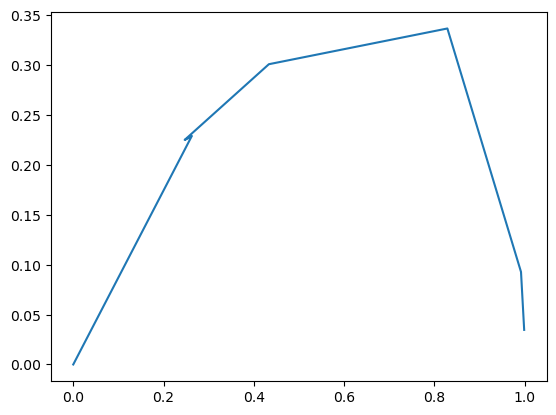

In [78]:
import matplotlib.pyplot as plt
plt.plot(h[:],c[:])